In [388]:
using JLD2
using Plots
using StatsPlots
using Plots.PlotMeasures

In [324]:
f_1_10 = jldopen("kepler_bench_c6_f_1_10.jld2", "r");
folds_1_10 = read(f_1_10, "fscores");
f_11_20 = jldopen("kepler_bench_c6_f_11_20.jld2", "r");
folds_11_20 = read(f_11_20, "fscores");
f_21_30 = jldopen("kepler_bench_c6_f_21_30.jld2", "r");
folds_21_30 = read(f_21_30, "fscores");
# combine folds
fscores_c6 = vcat(folds_1_10, folds_11_20, folds_21_30);

In [325]:
length(fscores_c6)

30

In [326]:
length(fscores_c6[1].ts_scores)

25

In [327]:
pm_map = Dict(5 => 1, 15 => 2, 25 => 3, 35 => 4, 45 => 5, 55 => 6, 65 => 7, 75 => 8, 85 => 9, 95 => 10)

Dict{Int64, Int64} with 10 entries:
  5  => 1
  15 => 2
  35 => 4
  25 => 3
  45 => 5
  55 => 6
  65 => 7
  95 => 10
  85 => 9
  75 => 8

In [328]:
fscores_c6[1].ts_scores[1].instance_scores[1].pm_scores[pm_map[5]].mps_scores

15-element Vector{Float64}:
 0.0029501748055535647
 0.005313552628648477
 0.004079728182251376
 0.0033858463015016597
 0.001423672893961224
 0.002778920837867586
 0.005704619793826034
 0.0012318315803650302
 0.0033649130410050394
 0.0033176261211617522
 0.004479044469768598
 0.0021436801748852563
 0.0048702858910907336
 0.002089732751370215
 0.006683987025542594

In [329]:
function extract_fold_pm(fscores::Vector, fold_idx::Int, pm::Int)
    pm_map = Dict(5 => 1, 15 => 2, 25 => 3, 35 => 4, 45 => 5, 55 => 6, 65 => 7, 75 => 8, 85 => 9, 95 => 10)
    fold_marginalised = fscores[fold_idx]
    num_ts = length(fold_marginalised.ts_scores) # number of unique time series instances
    # loop over time series and extract the pm scores
    all_mps_pm_scores = []
    all_nn_pm_scores = []
    for ts in 1:num_ts
        per_instance_pm_scores_mps = []
        per_instance_pm_scores_nn = []
        num_instances = length(fold_marginalised.ts_scores[ts].instance_scores)
        for inst in 1:num_instances
            pm_marginalised = fold_marginalised.ts_scores[ts].instance_scores[inst].pm_scores[pm_map[pm]]
            push!(per_instance_pm_scores_mps, pm_marginalised.mps_scores)
            push!(per_instance_pm_scores_nn, pm_marginalised.nn_scores)
        end
        push!(all_mps_pm_scores, per_instance_pm_scores_mps...)
        push!(all_nn_pm_scores, per_instance_pm_scores_nn...)
    end
    return vcat(all_mps_pm_scores...), vcat(all_nn_pm_scores...)
end

extract_fold_pm (generic function with 1 method)

In [330]:
extract_fold_pm(fscores_c6, 1, 15)[1]

750-element Vector{Float64}:
 0.00439636801296923
 0.004130811630732847
 0.004057621378427966
 0.005180404371750485
 0.0040759670795453996
 0.003603141758921087
 0.004872404319011528
 0.0024995476123907097
 0.005424714495816507
 0.004233909652310251
 ⋮
 0.0016171232842974734
 0.0008102114629526472
 0.001845634088275587
 0.0015325211821646955
 0.0016121044785016624
 0.0016014799175259936
 0.0007132763621050249
 0.0018865715577135182
 0.0018645821836216201

In [331]:
mps_per_pm_30fold_mean_c6 = [mean([mean(extract_fold_pm(fscores_c6, fold, pm)[1]) for fold in 1:30]) for pm in 5:10:95]
mps_per_pm_30fold_std_err_c6 = [std([mean(extract_fold_pm(fscores_c6, fold, pm)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_c6 = [mean([mean(extract_fold_pm(fscores_c6, fold, pm)[2]) for fold in 1:30]) for pm in 5:10:95]
nn_per_pm_30fold_std_err_c6 = [std([mean(extract_fold_pm(fscores_c6, fold, pm)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]


10-element Vector{Float64}:
 3.6797714804383395e-5
 3.103446732556658e-5
 3.2542480265573595e-5
 3.23801864755521e-5
 3.188702721048777e-5
 3.121840092153841e-5
 3.105542755721466e-5
 3.1381481056210555e-5
 3.029854931892956e-5
 5.953515852293921e-5

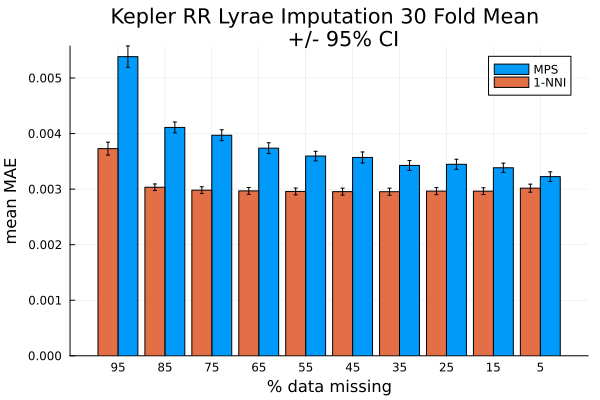

In [332]:
groupedbar([mps_per_pm_30fold_mean_c6 nn_per_pm_30fold_mean_c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_c6 1.96*nn_per_pm_30fold_std_err_c6],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Kepler RR Lyrae Imputation 30 Fold Mean 
    +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("kepler_c6_imputation_barplot_mps_nn_only.svg")

In [110]:
f_1_10_c4 = jldopen("kepler_bench_c4_f_1_10.jld2", "r");
folds_1_10_c4 = read(f_1_10_c4, "fscores");
f_11_20_c4 = jldopen("kepler_bench_c4_f_11_20.jld2", "r");
folds_11_20_c4 = read(f_11_20_c4, "fscores");
f_21_30_c4 = jldopen("kepler_bench_c4_f_21_30.jld2", "r");
folds_21_30_c4 = read(f_21_30_c4, "fscores");
fscores_c4 = vcat(folds_1_10_c4, folds_11_20_c4, folds_21_30_c4);

In [111]:
mps_per_pm_30fold_mean = [mean([mean(extract_fold_pm(fscores_c4, fold, pm)[1]) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err = [std([mean(extract_fold_pm(fscores_c4, fold, pm)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean = [mean([mean(extract_fold_pm(fscores_c4, f, pm)[2]) for f in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err = [std([mean(extract_fold_pm(fscores_c4, fold, pm)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 8.743176061704609e-8
 5.2248365554217005e-8
 5.192984919113644e-8
 4.1546879699294406e-8
 4.113915725865888e-8
 3.852414903796002e-8
 4.0133922743443004e-8
 3.677419942241582e-8
 3.249228097108409e-8
 2.7583003174887426e-8

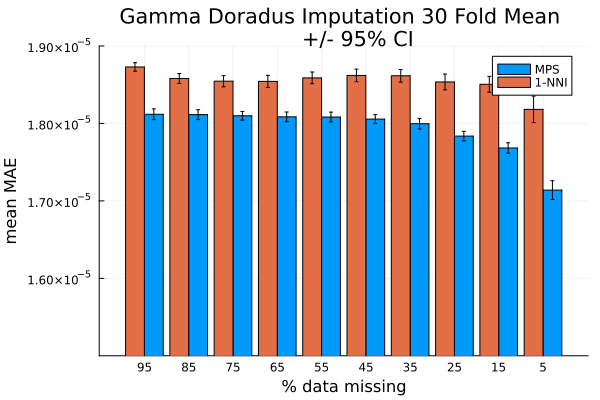

In [370]:
groupedbar([mps_per_pm_30fold_mean nn_per_pm_30fold_mean], 
    yerr=[1.96*mps_per_pm_30fold_std_err 1.96*nn_per_pm_30fold_std_err],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    ylims=(1.5e-5, 1.9e-5),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Gamma Doradus Imputation 30 Fold Mean 
    +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("kepler_c4_imputation_barplot_mps_nn_only.svg")

# Combining Results

In [119]:
# load the original time series folds
c4_ts_folds_f = jldopen("../kepler_c4_folds.jld2", "r")
c4_ts_folds = read(c4_ts_folds_f, "folds");

In [183]:
max_val = maximum(maximum(vcat(c4_ts_folds[1][2][1]'...), dims=2))
min_val = minimum(minimum(vcat(c4_ts_folds[1][2][1]'...), dims=2))
range = max_val - min_val

0.00013082589411195222

In [220]:
max_val = maximum(maximum(vcat(vcat(c4_ts_folds[1][1][1], c4_ts_folds[1][2][1])'...), dims=2))
min_val = minimum(minimum(vcat(vcat(c4_ts_folds[1][1][1], c4_ts_folds[1][2][1])'...), dims=2))
r = max_val - min_val

0.0002060463509944157

In [ ]:
function normalise_scores(scores, ts_folds)
    # make a copy of scores to modify with normalised values
    ranges = Dict()
    for fold in 1:1 # since all folds contain the same time series, just shuffled windows, ranges will be identical across folds
        # loop over folds
        ts_ranges = Dict()
        for ts in 1:length(scores[fold].ts_scores)
            # for each time series extract the range from all windows (train + test)
            all_windows_max = maximum(maximum(vcat(vcat(ts_folds[fold][1][ts], ts_folds[fold][2][ts])'...), dims=2))
            all_windows_min = minimum(minimum(vcat(vcat(ts_folds[fold][1][ts], ts_folds[fold][2][ts])'...), dims=2))
            all_windows_range = all_windows_max - all_windows_min
            ts_ranges[ts] = all_windows_range
        end
        ranges[fold] = ts_ranges
    end
    return ranges
end

normalise_scores (generic function with 2 methods)

In [321]:
ranges_c4 = normalise_scores(fscores_c4, c4_ts_folds);

In [310]:
function extract_fold_pm_with_normalised_scores(fscores::Vector, fold_idx::Int, pm::Int, ranges::Dict)
    pm_map = Dict(5 => 1, 15 => 2, 25 => 3, 35 => 4, 45 => 5, 55 => 6, 65 => 7, 75 => 8, 85 => 9, 95 => 10)
    fold_marginalised = fscores[fold_idx]
    num_ts = length(fold_marginalised.ts_scores) # number of unique time series instances
    # loop over time series and extract the pm scores
    all_mps_pm_scores = []
    all_nn_pm_scores = []
    for ts in 1:num_ts
        per_instance_pm_scores_mps = []
        per_instance_pm_scores_nn = []
        num_instances = length(fold_marginalised.ts_scores[ts].instance_scores)
        ts_range = ranges[1][ts] # get the range for a given time series to normalise the MAE
        for inst in 1:num_instances
            pm_marginalised = fold_marginalised.ts_scores[ts].instance_scores[inst].pm_scores[pm_map[pm]]
            pm_marginalised_mps = pm_marginalised.mps_scores ./ ts_range
            pm_marginalised_nn = pm_marginalised.nn_scores ./ ts_range 
            push!(per_instance_pm_scores_mps, pm_marginalised_mps)
            push!(per_instance_pm_scores_nn, pm_marginalised_nn)
        end
        push!(all_mps_pm_scores, per_instance_pm_scores_mps...)
        push!(all_nn_pm_scores, per_instance_pm_scores_nn...)
    end
    return vcat(all_mps_pm_scores...), vcat(all_nn_pm_scores...)
end

extract_fold_pm_with_normalised_scores (generic function with 1 method)

Re-compute the scores using normalisation

In [369]:
mps_per_pm_30fold_mean_n_c4 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1]) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err_n_c4 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_n_c4 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2]) for fold in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err_n_c4 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 0.0006022102632426657
 0.00039516852865437754
 0.00032968099321203806
 0.0002967714905783841
 0.0002969810379134712
 0.0002799407193804134
 0.0002639313799690924
 0.0002525757515212965
 0.00022502741419697228
 0.00024731127197661425

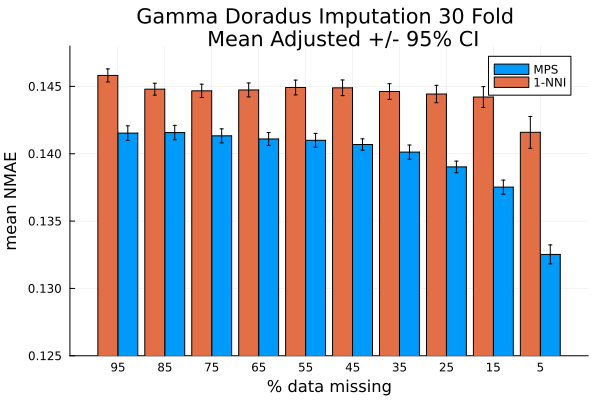

In [323]:
groupedbar([mps_per_pm_30fold_mean_n_c4 nn_per_pm_30fold_mean_n_c4], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4 1.96*nn_per_pm_30fold_std_err_n_c4],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    ylims=(0.125, 0.148),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Gamma Doradus Imputation 30 Fold 
    Mean Adjusted +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE")
xflip!(true)
#savefig("kepler_c4_imputation_barplot_mps_nn_only_final.svg")

Now for class 6

In [336]:
# load the folds for class 6
c6_ts_folds_f = jldopen("../kepler_c6_folds.jld2")
c6_ts_folds = read(c6_ts_folds_f, "folds");
ranges_c6 = normalise_scores(fscores_c6, c6_ts_folds);

In [367]:
mps_per_pm_30fold_mean_n_c6 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1]) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err_n_c6 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_n_c6 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2]) for fold in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err_n_c6 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 0.00038157368635931174
 0.0003269867517726579
 0.0003586548746688088
 0.00035603108031831735
 0.0003463821285442765
 0.00033582982345328494
 0.00033240399169764907
 0.0003342901158540493
 0.0003203074031532839
 0.000513548352290018

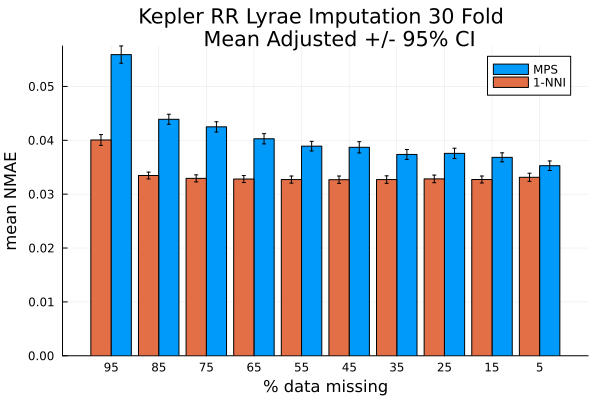

In [368]:
groupedbar([mps_per_pm_30fold_mean_n_c6 nn_per_pm_30fold_mean_n_c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c6 1.96*nn_per_pm_30fold_std_err_n_c6],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Kepler RR Lyrae Imputation 30 Fold 
    Mean Adjusted +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE")
xflip!(true)
#savefig("kepler_c6_imputation_barplot_mps_nn_only_final.svg")

Combined results across both classes and all instances

In [ ]:
15 * 50 * 2 # 15 window locations, 50 seperate time series (both classes), 2 test windows per time series

1500

In [366]:
mps_per_pm_30fold_mean_n_c4c6 = [mean([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1])) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err_n_c4c6 = [std([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1])) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_n_c4c6 = [mean([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2])) for fold in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err_n_c4c6 = [std([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2])) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 0.00035374268024363056
 0.00026128881621537706
 0.00025438485497749654
 0.00023995263985416944
 0.0002352365577906017
 0.00023411691545793535
 0.0002422943630448719
 0.000233141253494797
 0.00021042517000948314
 0.0002753377182618232

In [397]:
pal = palette(:tab10)

In [400]:
group_colours = [pal[4] pal[2]]

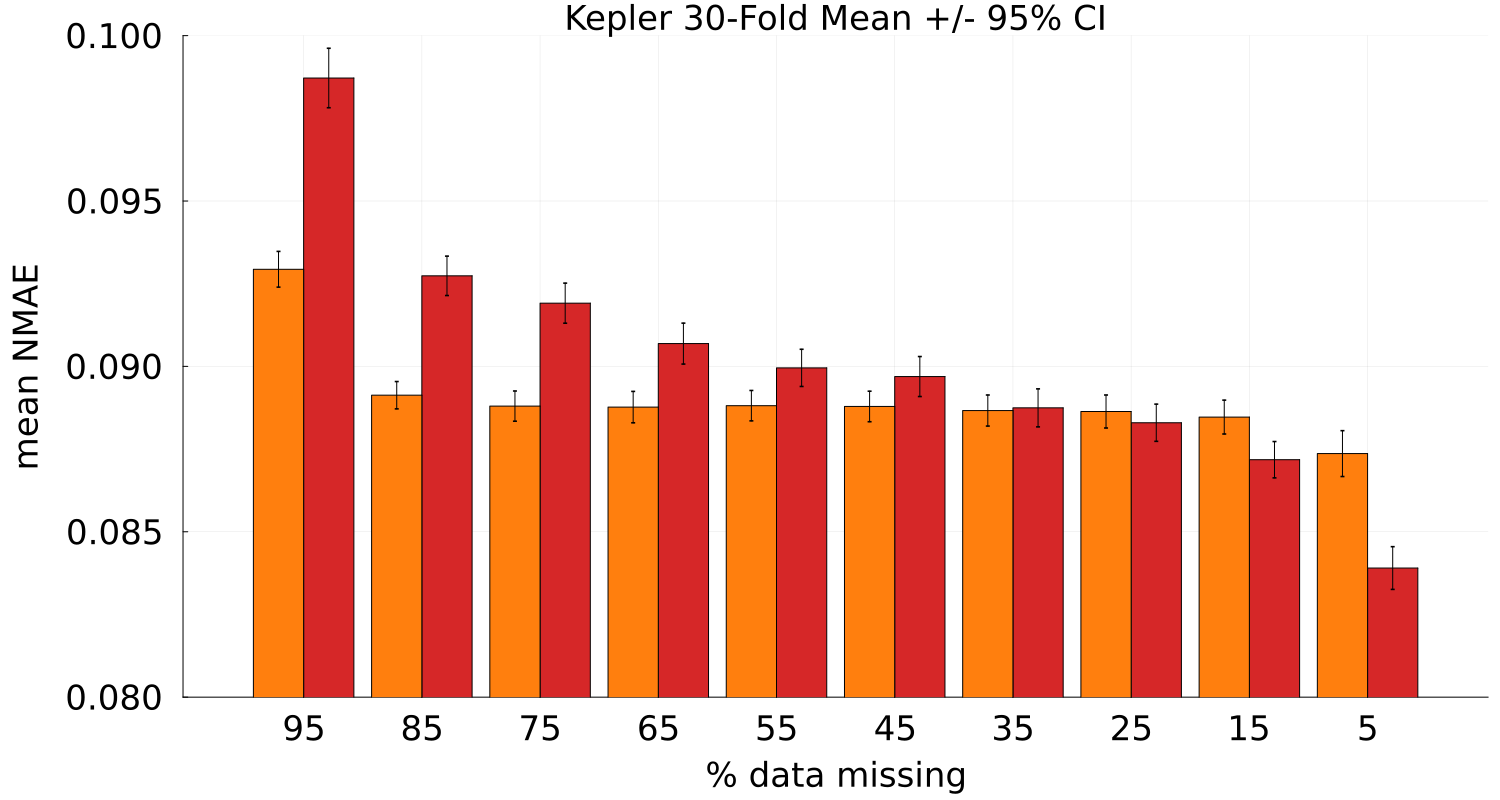

In [406]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean_n_c4c6 nn_per_pm_30fold_mean_n_c4c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4c6 1.96*nn_per_pm_30fold_std_err_n_c4c6],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.85,
    ylims=(0.08, 0.1),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=group_colours,
    label=["MPS" "1-NNI"],
    title="Kepler 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("kepler_combined_imputation_barplot_mps_nn_only_final.svg")